# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=60_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=30_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include randomness in the state transitions (e.g., maternity leave)
rlmodel='acktr' # use ACKTR algorithm
perusmalli='best/malli_perus2'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68.5
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
deterministic True

include_putki None
step 0.25

train...
phase 1
acktr acktr
batch 1 learning rate 0.25 scaled 0.25




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.885    |
| fps                | 1509     |
| nupdates           | 1        |
| policy_entropy     | 1.26     |
| policy_loss        | 0.151    |
| total_timesteps    | 0        |
| value_loss         | 0.467    |
---------------------

---------------------------------
| explained_variance | 0.684    |
| fps                | 2267     |
| nupdates           | 20       |
| policy_entropy     | 0.488    |
| policy_loss        | 1.54     |
| total_timesteps    | 46531    |
| value_loss         | 15.4     |
---------------------------------
---------------------------------
| explained_variance | 0.648    |
| fps                | 2183     |
| nupdates           | 30       |
| policy_entropy     | 0.518    |
| policy_loss        | 0.0835   |
| total_timesteps    | 71021    |
| value_loss         | 2.68     |
---------------------------------
---------------------------------
| explained_variance | 0.769    |
| fps                | 2143     |
| nupdates           | 40       |
| policy_entropy     | 0.501    |
| policy_loss        | -0.979   |
| total_timesteps    | 95511    |
| value_loss         | 7.16     |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 2041     |
| nupdates           | 290      |
| policy_entropy     | 0.607    |
| policy_loss        | -0.0269  |
| total_timesteps    | 707761   |
| value_loss         | 0.557    |
---------------------------------
---------------------------------
| explained_variance | 0.931    |
| fps                | 2041     |
| nupdates           | 300      |
| policy_entropy     | 0.592    |
| policy_loss        | -0.427   |
| total_timesteps    | 732251   |
| value_loss         | 0.935    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2041     |
| nupdates           | 310      |
| policy_entropy     | 0.602    |
| policy_loss        | 0.494    |
| total_timesteps    | 756741   |
| value_loss         | 1.11     |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.937    |
| fps                | 2036     |
| nupdates           | 560      |
| policy_entropy     | 0.525    |
| policy_loss        | -0.503   |
| total_timesteps    | 1368991  |
| value_loss         | 1.37     |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps                | 2036     |
| nupdates           | 570      |
| policy_entropy     | 0.548    |
| policy_loss        | -0.00368 |
| total_timesteps    | 1393481  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.929    |
| fps                | 2037     |
| nupdates           | 580      |
| policy_entropy     | 0.597    |
| policy_loss        | 0.356    |
| total_timesteps    | 1417971  |
| value_loss         | 0.977    |
---------------------------------
---------------------------------
| explained_variance | 0.927    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 2039     |
| nupdates           | 830      |
| policy_entropy     | 0.468    |
| policy_loss        | 0.226    |
| total_timesteps    | 2030221  |
| value_loss         | 0.676    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2039     |
| nupdates           | 840      |
| policy_entropy     | 0.426    |
| policy_loss        | -0.0489  |
| total_timesteps    | 2054711  |
| value_loss         | 0.377    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2039     |
| nupdates           | 850      |
| policy_entropy     | 0.45     |
| policy_loss        | -0.175   |
| total_timesteps    | 2079201  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2042     |
| nupdates           | 1100     |
| policy_entropy     | 0.436    |
| policy_loss        | 0.0155   |
| total_timesteps    | 2691451  |
| value_loss         | 0.256    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2042     |
| nupdates           | 1110     |
| policy_entropy     | 0.506    |
| policy_loss        | -0.00804 |
| total_timesteps    | 2715941  |
| value_loss         | 0.246    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2042     |
| nupdates           | 1120     |
| policy_entropy     | 0.571    |
| policy_loss        | 0.00604  |
| total_timesteps    | 2740431  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2045     |
| nupdates           | 1370     |
| policy_entropy     | 0.795    |
| policy_loss        | -0.228   |
| total_timesteps    | 3352681  |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2045     |
| nupdates           | 1380     |
| policy_entropy     | 0.758    |
| policy_loss        | -0.00771 |
| total_timesteps    | 3377171  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2045     |
| nupdates           | 1390     |
| policy_entropy     | 0.768    |
| policy_loss        | -0.0916  |
| total_timesteps    | 3401661  |
| value_loss         | 0.252    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 2048     |
| nupdates           | 1640     |
| policy_entropy     | 0.771    |
| policy_loss        | -0.224   |
| total_timesteps    | 4013911  |
| value_loss         | 0.459    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2048     |
| nupdates           | 1650     |
| policy_entropy     | 0.779    |
| policy_loss        | 0.0747   |
| total_timesteps    | 4038401  |
| value_loss         | 0.464    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 2049     |
| nupdates           | 1660     |
| policy_entropy     | 0.753    |
| policy_loss        | 0.286    |
| total_timesteps    | 4062891  |
| value_loss         | 0.799    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2051     |
| nupdates           | 1910     |
| policy_entropy     | 0.752    |
| policy_loss        | 0.0526   |
| total_timesteps    | 4675141  |
| value_loss         | 0.363    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2051     |
| nupdates           | 1920     |
| policy_entropy     | 0.804    |
| policy_loss        | -0.386   |
| total_timesteps    | 4699631  |
| value_loss         | 0.414    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2051     |
| nupdates           | 1930     |
| policy_entropy     | 0.803    |
| policy_loss        | 0.425    |
| total_timesteps    | 4724121  |
| value_loss         | 0.714    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 2054     |
| nupdates           | 2180     |
| policy_entropy     | 0.852    |
| policy_loss        | -0.476   |
| total_timesteps    | 5336371  |
| value_loss         | 0.591    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2054     |
| nupdates           | 2190     |
| policy_entropy     | 0.825    |
| policy_loss        | 0.0732   |
| total_timesteps    | 5360861  |
| value_loss         | 0.243    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2054     |
| nupdates           | 2200     |
| policy_entropy     | 0.858    |
| policy_loss        | 0.165    |
| total_timesteps    | 5385351  |
| value_loss         | 0.56     |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 2057     |
| nupdates           | 2450     |
| policy_entropy     | 0.785    |
| policy_loss        | -0.0222  |
| total_timesteps    | 5997601  |
| value_loss         | 0.384    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 2057     |
| nupdates           | 2460     |
| policy_entropy     | 0.82     |
| policy_loss        | -0.11    |
| total_timesteps    | 6022091  |
| value_loss         | 0.485    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2057     |
| nupdates           | 2470     |
| policy_entropy     | 0.787    |
| policy_loss        | 0.000646 |
| total_timesteps    | 6046581  |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2059     |
| nupdates           | 2720     |
| policy_entropy     | 0.772    |
| policy_loss        | -0.0145  |
| total_timesteps    | 6658831  |
| value_loss         | 0.379    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2059     |
| nupdates           | 2730     |
| policy_entropy     | 0.751    |
| policy_loss        | 0.0524   |
| total_timesteps    | 6683321  |
| value_loss         | 0.282    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2059     |
| nupdates           | 2740     |
| policy_entropy     | 0.772    |
| policy_loss        | -0.181   |
| total_timesteps    | 6707811  |
| value_loss         | 0.465    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2062     |
| nupdates           | 2990     |
| policy_entropy     | 0.82     |
| policy_loss        | -0.472   |
| total_timesteps    | 7320061  |
| value_loss         | 0.658    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2062     |
| nupdates           | 3000     |
| policy_entropy     | 0.735    |
| policy_loss        | 0.512    |
| total_timesteps    | 7344551  |
| value_loss         | 1.01     |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 2062     |
| nupdates           | 3010     |
| policy_entropy     | 0.774    |
| policy_loss        | 0.472    |
| total_timesteps    | 7369041  |
| value_loss         | 1.01     |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 2064     |
| nupdates           | 3260     |
| policy_entropy     | 0.805    |
| policy_loss        | 0.313    |
| total_timesteps    | 7981291  |
| value_loss         | 0.638    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 2064     |
| nupdates           | 3270     |
| policy_entropy     | 0.765    |
| policy_loss        | 0.0365   |
| total_timesteps    | 8005781  |
| value_loss         | 0.569    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2064     |
| nupdates           | 3280     |
| policy_entropy     | 0.712    |
| policy_loss        | -0.615   |
| total_timesteps    | 8030271  |
| value_loss         | 1.34     |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2065     |
| nupdates           | 3530     |
| policy_entropy     | 0.703    |
| policy_loss        | 0.0194   |
| total_timesteps    | 8642521  |
| value_loss         | 0.2      |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2065     |
| nupdates           | 3540     |
| policy_entropy     | 0.756    |
| policy_loss        | 0.035    |
| total_timesteps    | 8667011  |
| value_loss         | 0.373    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2065     |
| nupdates           | 3550     |
| policy_entropy     | 0.755    |
| policy_loss        | 0.182    |
| total_timesteps    | 8691501  |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.922    |
| fps                | 2066     |
| nupdates           | 3800     |
| policy_entropy     | 0.786    |
| policy_loss        | 0.119    |
| total_timesteps    | 9303751  |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2066     |
| nupdates           | 3810     |
| policy_entropy     | 0.763    |
| policy_loss        | -0.065   |
| total_timesteps    | 9328241  |
| value_loss         | 0.252    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2066     |
| nupdates           | 3820     |
| policy_entropy     | 0.747    |
| policy_loss        | -0.0291  |
| total_timesteps    | 9352731  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2067     |
| nupdates           | 4070     |
| policy_entropy     | 0.767    |
| policy_loss        | 0.0431   |
| total_timesteps    | 9964981  |
| value_loss         | 0.189    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2067     |
| nupdates           | 4080     |
| policy_entropy     | 0.791    |
| policy_loss        | 0.00463  |
| total_timesteps    | 9989471  |
| value_loss         | 0.309    |
---------------------------------
done
phase 2
init vecmonitor:  tmp/monitor.csv
acktr acktr
batch 75 learning rate 0.25 scaled 2.165063509461097
training...
done
predict...
simulating  best/malli_perus2
predicting...


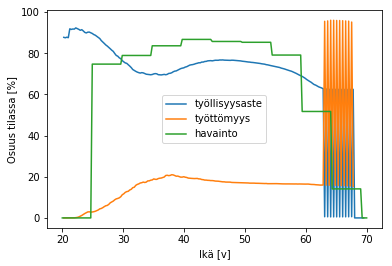

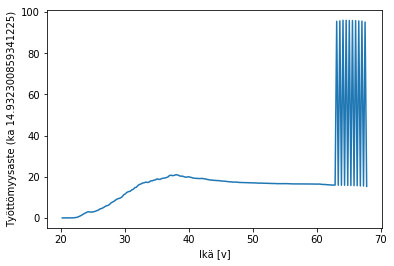

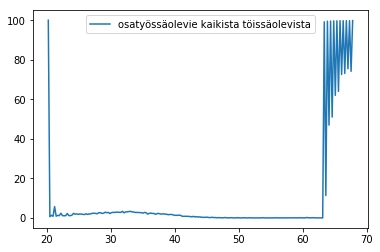

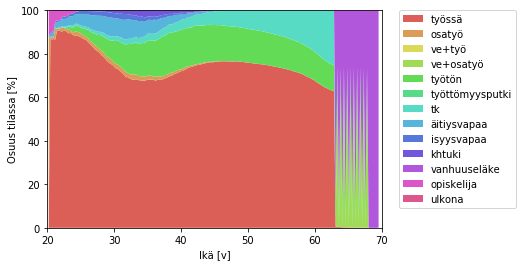

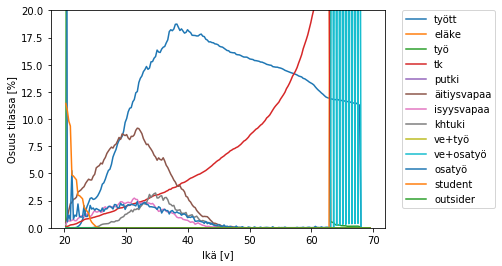

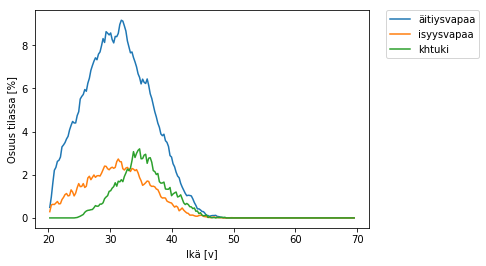

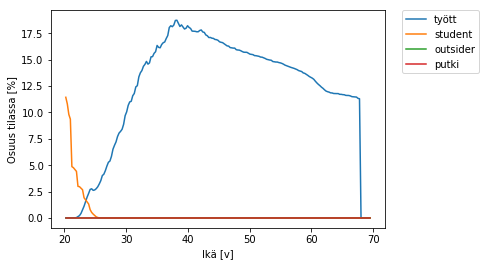

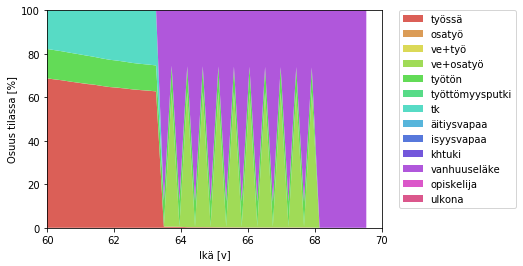

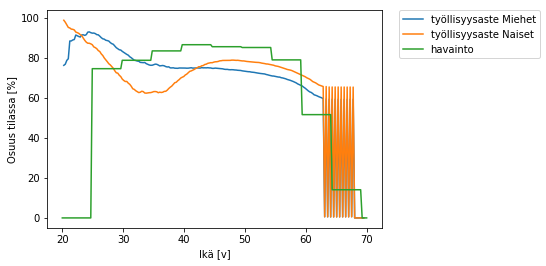

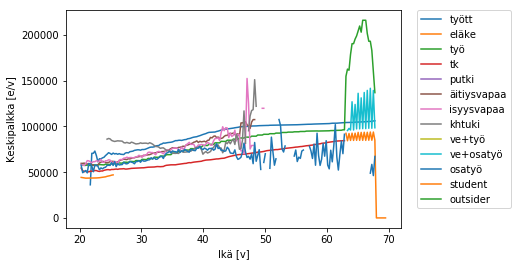

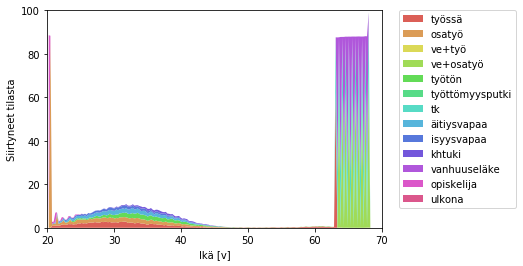

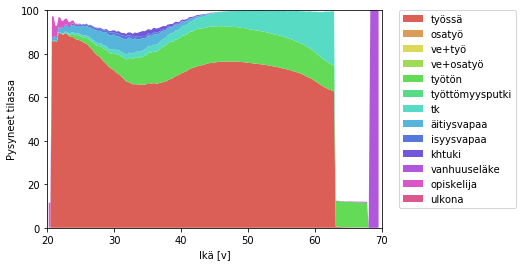

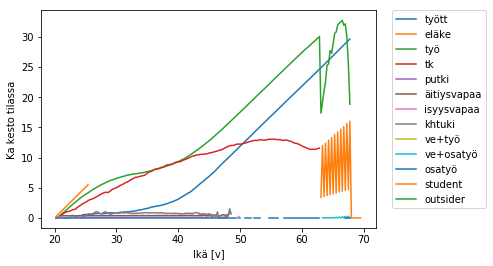

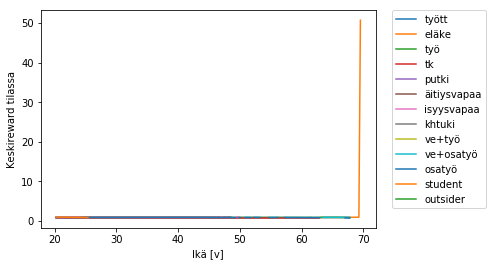

No handles with labels found to put in legend.


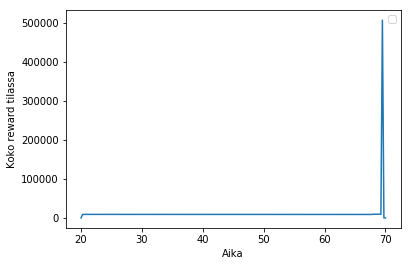

Yhteensä reward 233.77248404001986


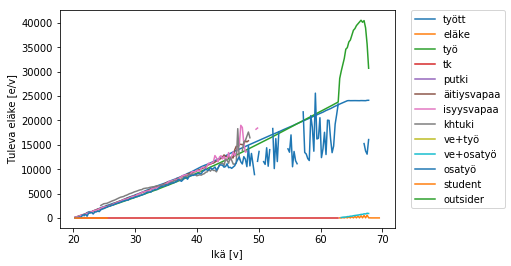

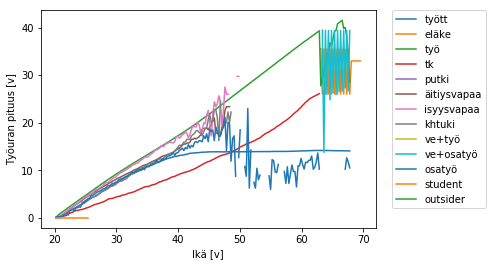

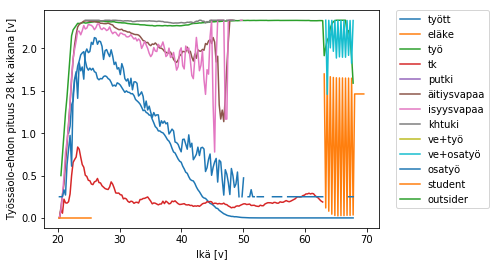

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              deterministic=deterministic,randomness=randomness)
if True:
    cc1.explain()
    cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save=perusmalli,
                    plot=True,cont=True,start_from=perusmalli,results='results/perus_results2',
                    callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=True)
cc1.render(load='results/perus_results2')

In [4]:
#%tensorboard --logdir tmp/tenb

# Porrastettu työttömyysturva



No mortality included
train...
phase 1
acktr acktr
batch 1 learning rate 0.25 scaled 0.25
training...
---------------------------------
| explained_variance | 0.936    |
| fps                | 1564     |
| nupdates           | 1        |
| policy_entropy     | 1.26     |
| policy_loss        | -0.167   |
| total_timesteps    | 0        |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | -0.0381  |
| fps                | 2605     |
| nupdates           | 10       |
| policy_entropy     | 0.326    |
| policy_loss        | 0.0308   |
| total_timesteps    | 22041    |
| value_loss         | 6.82     |
---------------------------------
---------------------------------
| explained_variance | 0.377    |
| fps                | 2268     |
| nupdates           | 20       |
| policy_entropy     | 0.434    |
| policy_loss        | 6.04     |
| total_timesteps    | 46531    |
| value_loss         | 222      |
--------------

---------------------------------
| explained_variance | 0.934    |
| fps                | 2044     |
| nupdates           | 270      |
| policy_entropy     | 0.646    |
| policy_loss        | -0.127   |
| total_timesteps    | 658781   |
| value_loss         | 0.749    |
---------------------------------
---------------------------------
| explained_variance | 0.912    |
| fps                | 2043     |
| nupdates           | 280      |
| policy_entropy     | 0.669    |
| policy_loss        | -0.825   |
| total_timesteps    | 683271   |
| value_loss         | 2.02     |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2043     |
| nupdates           | 290      |
| policy_entropy     | 0.668    |
| policy_loss        | 0.446    |
| total_timesteps    | 707761   |
| value_loss         | 0.931    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.936    |
| fps                | 2040     |
| nupdates           | 540      |
| policy_entropy     | 0.783    |
| policy_loss        | -1.09    |
| total_timesteps    | 1320011  |
| value_loss         | 2.66     |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2039     |
| nupdates           | 550      |
| policy_entropy     | 0.803    |
| policy_loss        | -0.327   |
| total_timesteps    | 1344501  |
| value_loss         | 0.546    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 2039     |
| nupdates           | 560      |
| policy_entropy     | 0.842    |
| policy_loss        | 0.835    |
| total_timesteps    | 1368991  |
| value_loss         | 1.56     |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 2036     |
| nupdates           | 810      |
| policy_entropy     | 0.815    |
| policy_loss        | 0.479    |
| total_timesteps    | 1981241  |
| value_loss         | 0.657    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2036     |
| nupdates           | 820      |
| policy_entropy     | 0.83     |
| policy_loss        | -0.0888  |
| total_timesteps    | 2005731  |
| value_loss         | 0.312    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2036     |
| nupdates           | 830      |
| policy_entropy     | 0.846    |
| policy_loss        | -0.0794  |
| total_timesteps    | 2030221  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2033     |
| nupdates           | 1080     |
| policy_entropy     | 0.821    |
| policy_loss        | -0.0343  |
| total_timesteps    | 2642471  |
| value_loss         | 0.3      |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2033     |
| nupdates           | 1090     |
| policy_entropy     | 0.804    |
| policy_loss        | 0.0705   |
| total_timesteps    | 2666961  |
| value_loss         | 0.176    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2033     |
| nupdates           | 1100     |
| policy_entropy     | 0.84     |
| policy_loss        | -0.158   |
| total_timesteps    | 2691451  |
| value_loss         | 0.37     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2030     |
| nupdates           | 1350     |
| policy_entropy     | 0.77     |
| policy_loss        | 0.012    |
| total_timesteps    | 3303701  |
| value_loss         | 0.253    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2030     |
| nupdates           | 1360     |
| policy_entropy     | 0.765    |
| policy_loss        | 0.036    |
| total_timesteps    | 3328191  |
| value_loss         | 0.227    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2031     |
| nupdates           | 1370     |
| policy_entropy     | 0.763    |
| policy_loss        | 0.0219   |
| total_timesteps    | 3352681  |
| value_loss         | 0.391    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2031     |
| nupdates           | 1620     |
| policy_entropy     | 0.728    |
| policy_loss        | 0.0764   |
| total_timesteps    | 3964931  |
| value_loss         | 0.277    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2031     |
| nupdates           | 1630     |
| policy_entropy     | 0.788    |
| policy_loss        | -0.0306  |
| total_timesteps    | 3989421  |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2031     |
| nupdates           | 1640     |
| policy_entropy     | 0.782    |
| policy_loss        | -0.0176  |
| total_timesteps    | 4013911  |
| value_loss         | 0.188    |
---------------------------------
----------------------------------
| explained_variance | 0.971     |
| fps       

---------------------------------
| explained_variance | 0.96     |
| fps                | 2032     |
| nupdates           | 1890     |
| policy_entropy     | 0.819    |
| policy_loss        | 0.00522  |
| total_timesteps    | 4626161  |
| value_loss         | 0.393    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2032     |
| nupdates           | 1900     |
| policy_entropy     | 0.757    |
| policy_loss        | -0.0745  |
| total_timesteps    | 4650651  |
| value_loss         | 0.316    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2032     |
| nupdates           | 1910     |
| policy_entropy     | 0.795    |
| policy_loss        | 0.12     |
| total_timesteps    | 4675141  |
| value_loss         | 0.402    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2036     |
| nupdates           | 2160     |
| policy_entropy     | 0.783    |
| policy_loss        | -0.0961  |
| total_timesteps    | 5287391  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2036     |
| nupdates           | 2170     |
| policy_entropy     | 0.757    |
| policy_loss        | -0.044   |
| total_timesteps    | 5311881  |
| value_loss         | 0.35     |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 2036     |
| nupdates           | 2180     |
| policy_entropy     | 0.801    |
| policy_loss        | -0.0883  |
| total_timesteps    | 5336371  |
| value_loss         | 0.434    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2040     |
| nupdates           | 2430     |
| policy_entropy     | 0.681    |
| policy_loss        | -0.0173  |
| total_timesteps    | 5948621  |
| value_loss         | 0.25     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2040     |
| nupdates           | 2440     |
| policy_entropy     | 0.789    |
| policy_loss        | -0.0496  |
| total_timesteps    | 5973111  |
| value_loss         | 0.402    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2040     |
| nupdates           | 2450     |
| policy_entropy     | 0.747    |
| policy_loss        | 0.0125   |
| total_timesteps    | 5997601  |
| value_loss         | 0.148    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2043     |
| nupdates           | 2700     |
| policy_entropy     | 0.753    |
| policy_loss        | 0.0947   |
| total_timesteps    | 6609851  |
| value_loss         | 0.37     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2043     |
| nupdates           | 2710     |
| policy_entropy     | 0.719    |
| policy_loss        | 0.0303   |
| total_timesteps    | 6634341  |
| value_loss         | 0.335    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2043     |
| nupdates           | 2720     |
| policy_entropy     | 0.736    |
| policy_loss        | -0.0426  |
| total_timesteps    | 6658831  |
| value_loss         | 0.189    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2046     |
| nupdates           | 2970     |
| policy_entropy     | 0.753    |
| policy_loss        | -0.0671  |
| total_timesteps    | 7271081  |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2046     |
| nupdates           | 2980     |
| policy_entropy     | 0.698    |
| policy_loss        | 0.0734   |
| total_timesteps    | 7295571  |
| value_loss         | 0.315    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2046     |
| nupdates           | 2990     |
| policy_entropy     | 0.748    |
| policy_loss        | -0.058   |
| total_timesteps    | 7320061  |
| value_loss         | 0.248    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.919    |
| fps                | 2047     |
| nupdates           | 3240     |
| policy_entropy     | 0.851    |
| policy_loss        | 0.111    |
| total_timesteps    | 7932311  |
| value_loss         | 0.557    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 2047     |
| nupdates           | 3250     |
| policy_entropy     | 0.787    |
| policy_loss        | 0.349    |
| total_timesteps    | 7956801  |
| value_loss         | 0.763    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 2047     |
| nupdates           | 3260     |
| policy_entropy     | 0.833    |
| policy_loss        | -0.546   |
| total_timesteps    | 7981291  |
| value_loss         | 0.958    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2048     |
| nupdates           | 3510     |
| policy_entropy     | 0.756    |
| policy_loss        | -0.289   |
| total_timesteps    | 8593541  |
| value_loss         | 0.408    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2048     |
| nupdates           | 3520     |
| policy_entropy     | 0.818    |
| policy_loss        | -0.165   |
| total_timesteps    | 8618031  |
| value_loss         | 0.472    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2048     |
| nupdates           | 3530     |
| policy_entropy     | 0.797    |
| policy_loss        | 0.326    |
| total_timesteps    | 8642521  |
| value_loss         | 0.555    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps         

---------------------------------
| explained_variance | 0.938    |
| fps                | 2048     |
| nupdates           | 3780     |
| policy_entropy     | 0.769    |
| policy_loss        | 0.535    |
| total_timesteps    | 9254771  |
| value_loss         | 1.21     |
---------------------------------
---------------------------------
| explained_variance | 0.899    |
| fps                | 2048     |
| nupdates           | 3790     |
| policy_entropy     | 0.826    |
| policy_loss        | -0.497   |
| total_timesteps    | 9279261  |
| value_loss         | 0.965    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2048     |
| nupdates           | 3800     |
| policy_entropy     | 0.772    |
| policy_loss        | -0.0211  |
| total_timesteps    | 9303751  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2047     |
| nupdates           | 4050     |
| policy_entropy     | 0.732    |
| policy_loss        | -0.00567 |
| total_timesteps    | 9916001  |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2047     |
| nupdates           | 4060     |
| policy_entropy     | 0.748    |
| policy_loss        | -0.148   |
| total_timesteps    | 9940491  |
| value_loss         | 0.379    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2047     |
| nupdates           | 4070     |
| policy_entropy     | 0.75     |
| policy_loss        | 0.0903   |
| total_timesteps    | 9964981  |
| value_loss         | 0.309    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 2044     |
| nupdates           | 4320     |
| policy_entropy     | 0.728    |
| policy_loss        | 0.00288  |
| total_timesteps    | 10577231 |
| value_loss         | 0.353    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2044     |
| nupdates           | 4330     |
| policy_entropy     | 0.798    |
| policy_loss        | -0.021   |
| total_timesteps    | 10601721 |
| value_loss         | 0.364    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2044     |
| nupdates           | 4340     |
| policy_entropy     | 0.746    |
| policy_loss        | -0.0694  |
| total_timesteps    | 10626211 |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.897    |
| fps                | 2040     |
| nupdates           | 4590     |
| policy_entropy     | 0.735    |
| policy_loss        | -0.0726  |
| total_timesteps    | 11238461 |
| value_loss         | 0.407    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2039     |
| nupdates           | 4600     |
| policy_entropy     | 0.736    |
| policy_loss        | -0.0319  |
| total_timesteps    | 11262951 |
| value_loss         | 0.253    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2039     |
| nupdates           | 4610     |
| policy_entropy     | 0.709    |
| policy_loss        | 0.0247   |
| total_timesteps    | 11287441 |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 2033     |
| nupdates           | 4860     |
| policy_entropy     | 0.721    |
| policy_loss        | 0.499    |
| total_timesteps    | 11899691 |
| value_loss         | 0.958    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2033     |
| nupdates           | 4870     |
| policy_entropy     | 0.736    |
| policy_loss        | 0.288    |
| total_timesteps    | 11924181 |
| value_loss         | 0.583    |
---------------------------------
---------------------------------
| explained_variance | 0.888    |
| fps                | 2032     |
| nupdates           | 4880     |
| policy_entropy     | 0.711    |
| policy_loss        | -0.635   |
| total_timesteps    | 11948671 |
| value_loss         | 1.29     |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2026     |
| nupdates           | 5130     |
| policy_entropy     | 0.794    |
| policy_loss        | -0.0301  |
| total_timesteps    | 12560921 |
| value_loss         | 0.319    |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 2026     |
| nupdates           | 5140     |
| policy_entropy     | 0.735    |
| policy_loss        | -0.129   |
| total_timesteps    | 12585411 |
| value_loss         | 0.692    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2026     |
| nupdates           | 5150     |
| policy_entropy     | 0.721    |
| policy_loss        | -0.0662  |
| total_timesteps    | 12609901 |
| value_loss         | 0.397    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.953    |
| fps                | 2021     |
| nupdates           | 5400     |
| policy_entropy     | 0.719    |
| policy_loss        | 0.0185   |
| total_timesteps    | 13222151 |
| value_loss         | 0.474    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2020     |
| nupdates           | 5410     |
| policy_entropy     | 0.69     |
| policy_loss        | 0.00691  |
| total_timesteps    | 13246641 |
| value_loss         | 0.406    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2020     |
| nupdates           | 5420     |
| policy_entropy     | 0.66     |
| policy_loss        | 0.0263   |
| total_timesteps    | 13271131 |
| value_loss         | 0.409    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2016     |
| nupdates           | 5670     |
| policy_entropy     | 0.74     |
| policy_loss        | 0.0591   |
| total_timesteps    | 13883381 |
| value_loss         | 0.23     |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2016     |
| nupdates           | 5680     |
| policy_entropy     | 0.802    |
| policy_loss        | 0.0153   |
| total_timesteps    | 13907871 |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2016     |
| nupdates           | 5690     |
| policy_entropy     | 0.755    |
| policy_loss        | -0.0363  |
| total_timesteps    | 13932361 |
| value_loss         | 0.466    |
---------------------------------
---------------------------------
| explained_variance | 0.916    |
| fps         

---------------------------------
| explained_variance | 0.953    |
| fps                | 2013     |
| nupdates           | 5940     |
| policy_entropy     | 0.732    |
| policy_loss        | -0.0816  |
| total_timesteps    | 14544611 |
| value_loss         | 0.389    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 2013     |
| nupdates           | 5950     |
| policy_entropy     | 0.754    |
| policy_loss        | -0.0854  |
| total_timesteps    | 14569101 |
| value_loss         | 0.406    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2013     |
| nupdates           | 5960     |
| policy_entropy     | 0.719    |
| policy_loss        | 0.175    |
| total_timesteps    | 14593591 |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2011     |
| nupdates           | 6210     |
| policy_entropy     | 0.794    |
| policy_loss        | -0.0406  |
| total_timesteps    | 15205841 |
| value_loss         | 0.364    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2011     |
| nupdates           | 6220     |
| policy_entropy     | 0.745    |
| policy_loss        | 0.102    |
| total_timesteps    | 15230331 |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2011     |
| nupdates           | 6230     |
| policy_entropy     | 0.806    |
| policy_loss        | -0.135   |
| total_timesteps    | 15254821 |
| value_loss         | 0.38     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2010     |
| nupdates           | 6480     |
| policy_entropy     | 0.748    |
| policy_loss        | 0.0195   |
| total_timesteps    | 15867071 |
| value_loss         | 0.41     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2010     |
| nupdates           | 6490     |
| policy_entropy     | 0.757    |
| policy_loss        | -0.117   |
| total_timesteps    | 15891561 |
| value_loss         | 0.385    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2010     |
| nupdates           | 6500     |
| policy_entropy     | 0.724    |
| policy_loss        | 0.141    |
| total_timesteps    | 15916051 |
| value_loss         | 0.311    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.944    |
| fps                | 2008     |
| nupdates           | 6750     |
| policy_entropy     | 0.76     |
| policy_loss        | -0.452   |
| total_timesteps    | 16528301 |
| value_loss         | 0.933    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2008     |
| nupdates           | 6760     |
| policy_entropy     | 0.697    |
| policy_loss        | 0.132    |
| total_timesteps    | 16552791 |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.935    |
| fps                | 2008     |
| nupdates           | 6770     |
| policy_entropy     | 0.728    |
| policy_loss        | 0.707    |
| total_timesteps    | 16577281 |
| value_loss         | 1.61     |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2005     |
| nupdates           | 7020     |
| policy_entropy     | 0.761    |
| policy_loss        | 0.0376   |
| total_timesteps    | 17189531 |
| value_loss         | 0.387    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2005     |
| nupdates           | 7030     |
| policy_entropy     | 0.819    |
| policy_loss        | 0.656    |
| total_timesteps    | 17214021 |
| value_loss         | 1.26     |
---------------------------------
---------------------------------
| explained_variance | 0.939    |
| fps                | 2005     |
| nupdates           | 7040     |
| policy_entropy     | 0.804    |
| policy_loss        | -0.681   |
| total_timesteps    | 17238511 |
| value_loss         | 1.47     |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.925    |
| fps                | 2001     |
| nupdates           | 7290     |
| policy_entropy     | 0.692    |
| policy_loss        | -0.459   |
| total_timesteps    | 17850761 |
| value_loss         | 0.956    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2000     |
| nupdates           | 7300     |
| policy_entropy     | 0.737    |
| policy_loss        | 0.134    |
| total_timesteps    | 17875251 |
| value_loss         | 0.413    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2000     |
| nupdates           | 7310     |
| policy_entropy     | 0.733    |
| policy_loss        | 0.348    |
| total_timesteps    | 17899741 |
| value_loss         | 0.779    |
---------------------------------
---------------------------------
| explained_variance | 0.926    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 1995     |
| nupdates           | 7560     |
| policy_entropy     | 0.738    |
| policy_loss        | -0.00702 |
| total_timesteps    | 18511991 |
| value_loss         | 0.287    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 1994     |
| nupdates           | 7570     |
| policy_entropy     | 0.767    |
| policy_loss        | -0.0762  |
| total_timesteps    | 18536481 |
| value_loss         | 0.504    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1994     |
| nupdates           | 7580     |
| policy_entropy     | 0.739    |
| policy_loss        | 0.034    |
| total_timesteps    | 18560971 |
| value_loss         | 0.28     |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 1988     |
| nupdates           | 7830     |
| policy_entropy     | 0.81     |
| policy_loss        | -0.00418 |
| total_timesteps    | 19173221 |
| value_loss         | 0.446    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1987     |
| nupdates           | 7840     |
| policy_entropy     | 0.779    |
| policy_loss        | -0.131   |
| total_timesteps    | 19197711 |
| value_loss         | 0.367    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1987     |
| nupdates           | 7850     |
| policy_entropy     | 0.778    |
| policy_loss        | 0.0455   |
| total_timesteps    | 19222201 |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1978     |
| nupdates           | 8100     |
| policy_entropy     | 0.776    |
| policy_loss        | -0.0475  |
| total_timesteps    | 19834451 |
| value_loss         | 0.378    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 1978     |
| nupdates           | 8110     |
| policy_entropy     | 0.729    |
| policy_loss        | 0.136    |
| total_timesteps    | 19858941 |
| value_loss         | 0.355    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1978     |
| nupdates           | 8120     |
| policy_entropy     | 0.751    |
| policy_loss        | -0.00182 |
| total_timesteps    | 19883431 |
| value_loss         | 0.282    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 1969     |
| nupdates           | 8370     |
| policy_entropy     | 0.71     |
| policy_loss        | 0.222    |
| total_timesteps    | 20495681 |
| value_loss         | 0.545    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 1969     |
| nupdates           | 8380     |
| policy_entropy     | 0.748    |
| policy_loss        | -0.47    |
| total_timesteps    | 20520171 |
| value_loss         | 0.848    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 1969     |
| nupdates           | 8390     |
| policy_entropy     | 0.765    |
| policy_loss        | 0.338    |
| total_timesteps    | 20544661 |
| value_loss         | 0.687    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.937    |
| fps                | 1962     |
| nupdates           | 8640     |
| policy_entropy     | 0.709    |
| policy_loss        | -0.12    |
| total_timesteps    | 21156911 |
| value_loss         | 0.502    |
---------------------------------
---------------------------------
| explained_variance | 0.929    |
| fps                | 1961     |
| nupdates           | 8650     |
| policy_entropy     | 0.694    |
| policy_loss        | -0.332   |
| total_timesteps    | 21181401 |
| value_loss         | 0.743    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1961     |
| nupdates           | 8660     |
| policy_entropy     | 0.726    |
| policy_loss        | 0.475    |
| total_timesteps    | 21205891 |
| value_loss         | 1        |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 1955     |
| nupdates           | 8910     |
| policy_entropy     | 0.725    |
| policy_loss        | -0.00351 |
| total_timesteps    | 21818141 |
| value_loss         | 0.299    |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps                | 1955     |
| nupdates           | 8920     |
| policy_entropy     | 0.815    |
| policy_loss        | -0.0279  |
| total_timesteps    | 21842631 |
| value_loss         | 0.468    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1955     |
| nupdates           | 8930     |
| policy_entropy     | 0.72     |
| policy_loss        | -0.028   |
| total_timesteps    | 21867121 |
| value_loss         | 0.171    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.95     |
| fps                | 1951     |
| nupdates           | 9180     |
| policy_entropy     | 0.721    |
| policy_loss        | -0.145   |
| total_timesteps    | 22479371 |
| value_loss         | 0.449    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 1951     |
| nupdates           | 9190     |
| policy_entropy     | 0.785    |
| policy_loss        | 0.0277   |
| total_timesteps    | 22503861 |
| value_loss         | 0.452    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1951     |
| nupdates           | 9200     |
| policy_entropy     | 0.76     |
| policy_loss        | 0.0234   |
| total_timesteps    | 22528351 |
| value_loss         | 0.418    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 1947     |
| nupdates           | 9450     |
| policy_entropy     | 0.705    |
| policy_loss        | 0.133    |
| total_timesteps    | 23140601 |
| value_loss         | 0.359    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1947     |
| nupdates           | 9460     |
| policy_entropy     | 0.751    |
| policy_loss        | 0.0737   |
| total_timesteps    | 23165091 |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1947     |
| nupdates           | 9470     |
| policy_entropy     | 0.737    |
| policy_loss        | -0.0621  |
| total_timesteps    | 23189581 |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1943     |
| nupdates           | 9720     |
| policy_entropy     | 0.728    |
| policy_loss        | 0.0051   |
| total_timesteps    | 23801831 |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1943     |
| nupdates           | 9730     |
| policy_entropy     | 0.739    |
| policy_loss        | -0.00912 |
| total_timesteps    | 23826321 |
| value_loss         | 0.31     |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 1942     |
| nupdates           | 9740     |
| policy_entropy     | 0.717    |
| policy_loss        | 0.0496   |
| total_timesteps    | 23850811 |
| value_loss         | 0.408    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1938     |
| nupdates           | 9990     |
| policy_entropy     | 0.75     |
| policy_loss        | -0.0109  |
| total_timesteps    | 24463061 |
| value_loss         | 0.314    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1937     |
| nupdates           | 10000    |
| policy_entropy     | 0.739    |
| policy_loss        | -0.0177  |
| total_timesteps    | 24487551 |
| value_loss         | 0.345    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1937     |
| nupdates           | 10010    |
| policy_entropy     | 0.713    |
| policy_loss        | 0.0427   |
| total_timesteps    | 24512041 |
| value_loss         | 0.41     |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.936    |
| fps                | 1932     |
| nupdates           | 10260    |
| policy_entropy     | 0.77     |
| policy_loss        | -0.0921  |
| total_timesteps    | 25124291 |
| value_loss         | 0.491    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1931     |
| nupdates           | 10270    |
| policy_entropy     | 0.718    |
| policy_loss        | 0.0634   |
| total_timesteps    | 25148781 |
| value_loss         | 0.417    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1931     |
| nupdates           | 10280    |
| policy_entropy     | 0.752    |
| policy_loss        | 0.00506  |
| total_timesteps    | 25173271 |
| value_loss         | 0.261    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 1925     |
| nupdates           | 10530    |
| policy_entropy     | 0.736    |
| policy_loss        | 0.00138  |
| total_timesteps    | 25785521 |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1925     |
| nupdates           | 10540    |
| policy_entropy     | 0.725    |
| policy_loss        | 0.0561   |
| total_timesteps    | 25810011 |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1924     |
| nupdates           | 10550    |
| policy_entropy     | 0.764    |
| policy_loss        | -0.0817  |
| total_timesteps    | 25834501 |
| value_loss         | 0.366    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 1917     |
| nupdates           | 10800    |
| policy_entropy     | 0.697    |
| policy_loss        | 0.021    |
| total_timesteps    | 26446751 |
| value_loss         | 0.178    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1917     |
| nupdates           | 10810    |
| policy_entropy     | 0.767    |
| policy_loss        | -0.0036  |
| total_timesteps    | 26471241 |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 1916     |
| nupdates           | 10820    |
| policy_entropy     | 0.7      |
| policy_loss        | -0.00643 |
| total_timesteps    | 26495731 |
| value_loss         | 0.397    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 1910     |
| nupdates           | 11070    |
| policy_entropy     | 0.693    |
| policy_loss        | 0.065    |
| total_timesteps    | 27107981 |
| value_loss         | 0.267    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1909     |
| nupdates           | 11080    |
| policy_entropy     | 0.709    |
| policy_loss        | 0.0272   |
| total_timesteps    | 27132471 |
| value_loss         | 0.315    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1909     |
| nupdates           | 11090    |
| policy_entropy     | 0.739    |
| policy_loss        | -0.0767  |
| total_timesteps    | 27156961 |
| value_loss         | 0.542    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.952    |
| fps                | 1902     |
| nupdates           | 11340    |
| policy_entropy     | 0.815    |
| policy_loss        | -0.127   |
| total_timesteps    | 27769211 |
| value_loss         | 0.52     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1901     |
| nupdates           | 11350    |
| policy_entropy     | 0.78     |
| policy_loss        | -0.0369  |
| total_timesteps    | 27793701 |
| value_loss         | 0.419    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1901     |
| nupdates           | 11360    |
| policy_entropy     | 0.772    |
| policy_loss        | -0.0328  |
| total_timesteps    | 27818191 |
| value_loss         | 0.434    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 1894     |
| nupdates           | 11610    |
| policy_entropy     | 0.722    |
| policy_loss        | 0.0064   |
| total_timesteps    | 28430441 |
| value_loss         | 0.266    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1894     |
| nupdates           | 11620    |
| policy_entropy     | 0.718    |
| policy_loss        | 0.0428   |
| total_timesteps    | 28454931 |
| value_loss         | 0.273    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 1893     |
| nupdates           | 11630    |
| policy_entropy     | 0.733    |
| policy_loss        | -0.0132  |
| total_timesteps    | 28479421 |
| value_loss         | 0.545    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 1886     |
| nupdates           | 11880    |
| policy_entropy     | 0.79     |
| policy_loss        | -0.0191  |
| total_timesteps    | 29091671 |
| value_loss         | 0.378    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 1885     |
| nupdates           | 11890    |
| policy_entropy     | 0.738    |
| policy_loss        | -0.0218  |
| total_timesteps    | 29116161 |
| value_loss         | 0.458    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1885     |
| nupdates           | 11900    |
| policy_entropy     | 0.805    |
| policy_loss        | -0.0335  |
| total_timesteps    | 29140651 |
| value_loss         | 0.377    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.953    |
| fps                | 1878     |
| nupdates           | 12150    |
| policy_entropy     | 0.8      |
| policy_loss        | -0.0499  |
| total_timesteps    | 29752901 |
| value_loss         | 0.363    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1878     |
| nupdates           | 12160    |
| policy_entropy     | 0.795    |
| policy_loss        | -0.0015  |
| total_timesteps    | 29777391 |
| value_loss         | 0.259    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 1877     |
| nupdates           | 12170    |
| policy_entropy     | 0.761    |
| policy_loss        | -0.00146 |
| total_timesteps    | 29801881 |
| value_loss         | 0.492    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

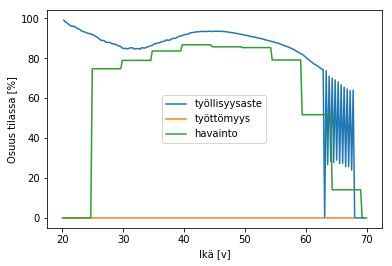

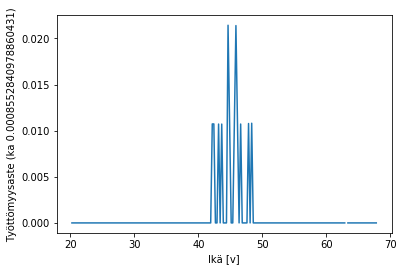

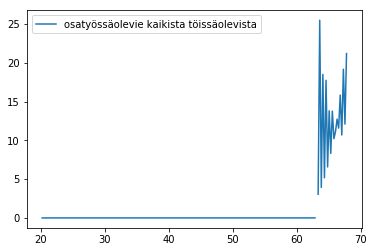

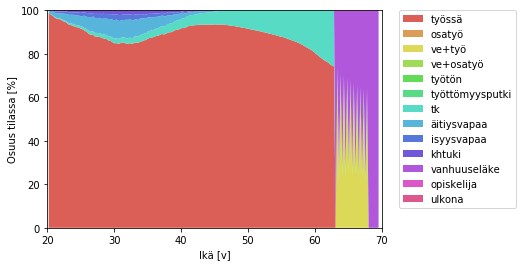

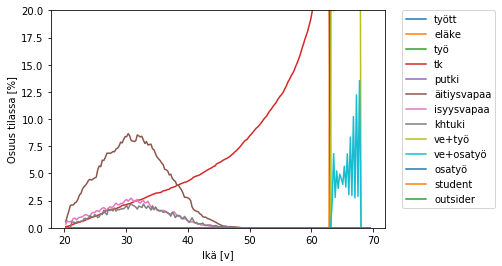

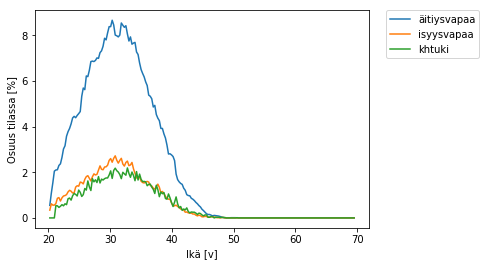

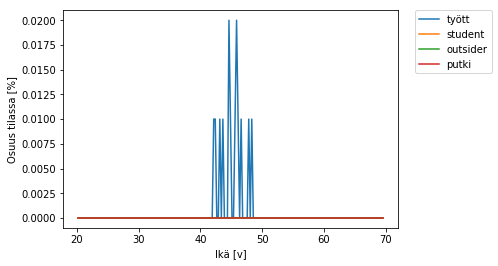

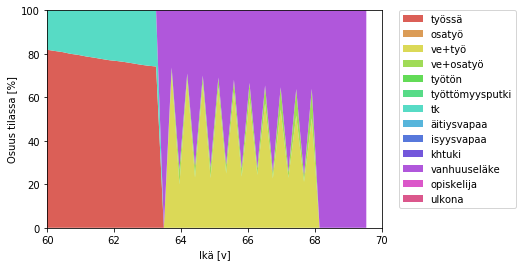

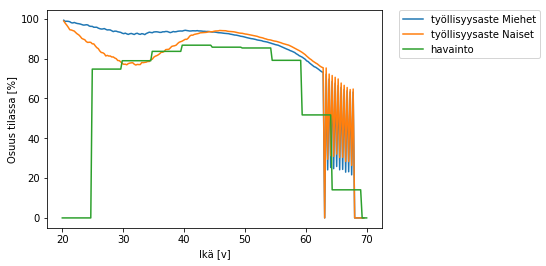

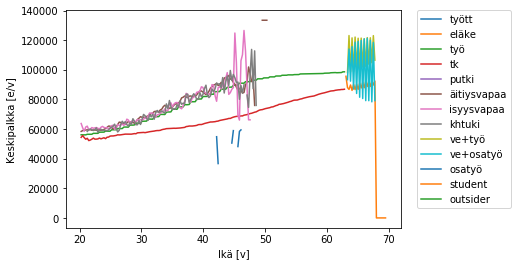

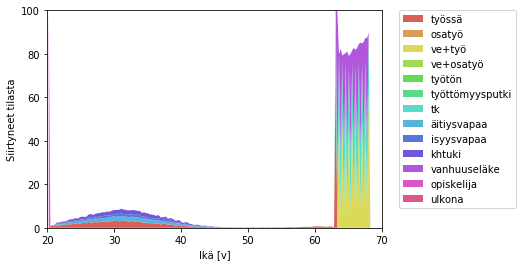

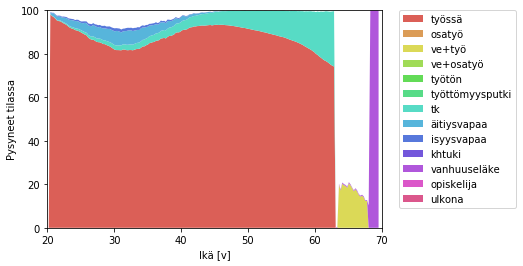

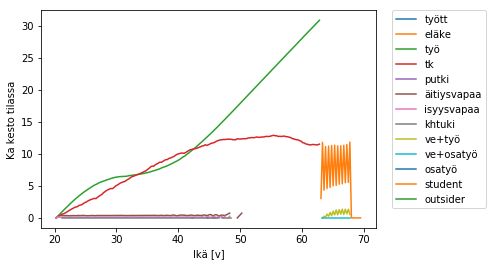

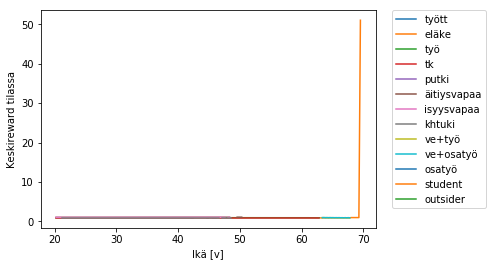

No handles with labels found to put in legend.


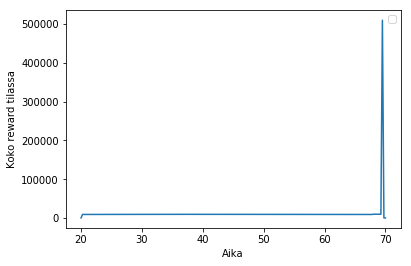

Yhteensä reward 235.56677255290012


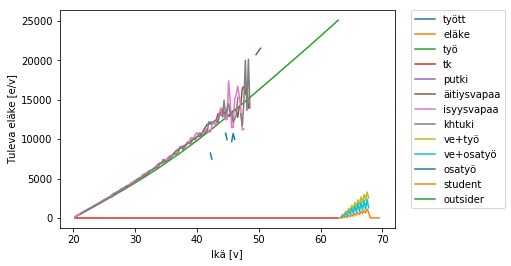

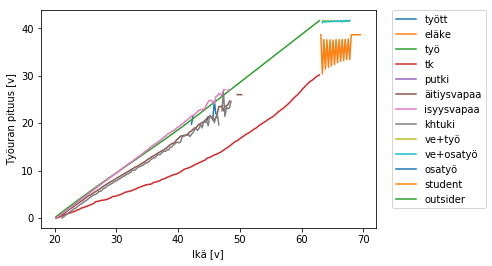

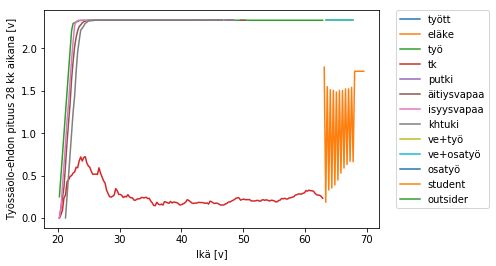

In [5]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=True,
                results='results/steps_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc2_porras.render(load='results/steps_results')


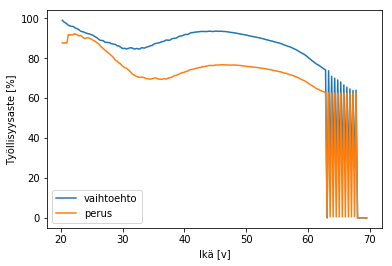

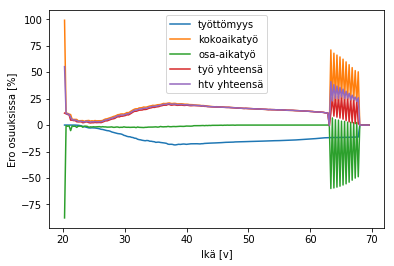

Työllisyysvaikutus 30-63-vuotiaisiin noin 366833.0 htv ja 359165.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 48.71797654201586 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.044203725910120006


In [6]:
cc2_porras.compare_with(cc1)

# Työttömyysputken poisto

Työttömyysputki on suosittu elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
train...
phase 1
acktr acktr
batch 1 learning rate 0.25 scaled 0.25
training...
---------------------------------
| explained_variance | 0.957    |
| fps                | 1566     |
| nupdates           | 1        |
| policy_entropy     | 1.25     |
| policy_loss        | 0.0762   |
| total_timesteps    | 0        |
| value_loss         | 0.423    |
---------------------------------
---------------------------------
| explained_variance | -0.768   |
| fps                | 2578     |
| nupdates           | 10       |
| policy_entropy     | 0.0772   |
| policy_loss        | -0.575   |
| total_timesteps    | 22041    |
| value_loss         | 92.4     |
---------------------------------
---------------------------------
| explained_variance | 0.215    |
| fps                | 2244     |
| nupdates           | 20       |
| policy_entropy     | 0.0849   |
| policy_loss        | 0.195    |
| total_timesteps    | 46531    |
| value_loss         | 11.1     |
--------------

---------------------------------
| explained_variance | 0.955    |
| fps                | 2018     |
| nupdates           | 270      |
| policy_entropy     | 0.235    |
| policy_loss        | 0.345    |
| total_timesteps    | 658781   |
| value_loss         | 2.42     |
---------------------------------
---------------------------------
| explained_variance | 0.913    |
| fps                | 2017     |
| nupdates           | 280      |
| policy_entropy     | 0.231    |
| policy_loss        | 0.289    |
| total_timesteps    | 683271   |
| value_loss         | 2.47     |
---------------------------------
---------------------------------
| explained_variance | 0.86     |
| fps                | 2017     |
| nupdates           | 290      |
| policy_entropy     | 0.25     |
| policy_loss        | -0.311   |
| total_timesteps    | 707761   |
| value_loss         | 2.19     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 2015     |
| nupdates           | 540      |
| policy_entropy     | 0.782    |
| policy_loss        | -0.345   |
| total_timesteps    | 1320011  |
| value_loss         | 0.814    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2016     |
| nupdates           | 550      |
| policy_entropy     | 0.783    |
| policy_loss        | 1.09     |
| total_timesteps    | 1344501  |
| value_loss         | 2.66     |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2016     |
| nupdates           | 560      |
| policy_entropy     | 0.774    |
| policy_loss        | -0.512   |
| total_timesteps    | 1368991  |
| value_loss         | 1.03     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 2019     |
| nupdates           | 810      |
| policy_entropy     | 0.872    |
| policy_loss        | -0.799   |
| total_timesteps    | 1981241  |
| value_loss         | 1.32     |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2019     |
| nupdates           | 820      |
| policy_entropy     | 0.885    |
| policy_loss        | 0.61     |
| total_timesteps    | 2005731  |
| value_loss         | 0.927    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2019     |
| nupdates           | 830      |
| policy_entropy     | 0.905    |
| policy_loss        | 0.387    |
| total_timesteps    | 2030221  |
| value_loss         | 0.546    |
---------------------------------
---------------------------------
| explained_variance | 0.922    |
| fps         

---------------------------------
| explained_variance | 0.943    |
| fps                | 2023     |
| nupdates           | 1080     |
| policy_entropy     | 0.898    |
| policy_loss        | 0.495    |
| total_timesteps    | 2642471  |
| value_loss         | 0.975    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2023     |
| nupdates           | 1090     |
| policy_entropy     | 0.881    |
| policy_loss        | 0.236    |
| total_timesteps    | 2666961  |
| value_loss         | 0.399    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 2024     |
| nupdates           | 1100     |
| policy_entropy     | 0.883    |
| policy_loss        | -0.533   |
| total_timesteps    | 2691451  |
| value_loss         | 0.863    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2027     |
| nupdates           | 1350     |
| policy_entropy     | 0.821    |
| policy_loss        | -0.0403  |
| total_timesteps    | 3303701  |
| value_loss         | 0.202    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2027     |
| nupdates           | 1360     |
| policy_entropy     | 0.828    |
| policy_loss        | 0.0897   |
| total_timesteps    | 3328191  |
| value_loss         | 0.427    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2028     |
| nupdates           | 1370     |
| policy_entropy     | 0.854    |
| policy_loss        | -0.114   |
| total_timesteps    | 3352681  |
| value_loss         | 0.488    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2031     |
| nupdates           | 1620     |
| policy_entropy     | 0.833    |
| policy_loss        | -0.00678 |
| total_timesteps    | 3964931  |
| value_loss         | 0.24     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2031     |
| nupdates           | 1630     |
| policy_entropy     | 0.79     |
| policy_loss        | -0.0182  |
| total_timesteps    | 3989421  |
| value_loss         | 0.24     |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2031     |
| nupdates           | 1640     |
| policy_entropy     | 0.908    |
| policy_loss        | 0.0371   |
| total_timesteps    | 4013911  |
| value_loss         | 0.246    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2034     |
| nupdates           | 1890     |
| policy_entropy     | 0.772    |
| policy_loss        | 0.0915   |
| total_timesteps    | 4626161  |
| value_loss         | 0.267    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2034     |
| nupdates           | 1900     |
| policy_entropy     | 0.748    |
| policy_loss        | 0.0968   |
| total_timesteps    | 4650651  |
| value_loss         | 0.338    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2034     |
| nupdates           | 1910     |
| policy_entropy     | 0.792    |
| policy_loss        | -0.0498  |
| total_timesteps    | 4675141  |
| value_loss         | 0.309    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2037     |
| nupdates           | 2160     |
| policy_entropy     | 0.774    |
| policy_loss        | -0.0231  |
| total_timesteps    | 5287391  |
| value_loss         | 0.389    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2037     |
| nupdates           | 2170     |
| policy_entropy     | 0.807    |
| policy_loss        | 0.0243   |
| total_timesteps    | 5311881  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2037     |
| nupdates           | 2180     |
| policy_entropy     | 0.834    |
| policy_loss        | -0.0858  |
| total_timesteps    | 5336371  |
| value_loss         | 0.47     |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2040     |
| nupdates           | 2430     |
| policy_entropy     | 0.736    |
| policy_loss        | 0.0539   |
| total_timesteps    | 5948621  |
| value_loss         | 0.145    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2040     |
| nupdates           | 2440     |
| policy_entropy     | 0.783    |
| policy_loss        | -0.00943 |
| total_timesteps    | 5973111  |
| value_loss         | 0.212    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2040     |
| nupdates           | 2450     |
| policy_entropy     | 0.77     |
| policy_loss        | 0.057    |
| total_timesteps    | 5997601  |
| value_loss         | 0.198    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2042     |
| nupdates           | 2700     |
| policy_entropy     | 0.739    |
| policy_loss        | -0.0577  |
| total_timesteps    | 6609851  |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 2042     |
| nupdates           | 2710     |
| policy_entropy     | 0.749    |
| policy_loss        | -0.0617  |
| total_timesteps    | 6634341  |
| value_loss         | 0.389    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 2042     |
| nupdates           | 2720     |
| policy_entropy     | 0.716    |
| policy_loss        | 0.141    |
| total_timesteps    | 6658831  |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.89     |
| fps                | 2044     |
| nupdates           | 2970     |
| policy_entropy     | 0.79     |
| policy_loss        | -0.887   |
| total_timesteps    | 7271081  |
| value_loss         | 1.85     |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2044     |
| nupdates           | 2980     |
| policy_entropy     | 0.816    |
| policy_loss        | 0.138    |
| total_timesteps    | 7295571  |
| value_loss         | 0.465    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 2044     |
| nupdates           | 2990     |
| policy_entropy     | 0.86     |
| policy_loss        | 0.431    |
| total_timesteps    | 7320061  |
| value_loss         | 0.906    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2046     |
| nupdates           | 3240     |
| policy_entropy     | 0.752    |
| policy_loss        | 0.0497   |
| total_timesteps    | 7932311  |
| value_loss         | 0.27     |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2046     |
| nupdates           | 3250     |
| policy_entropy     | 0.769    |
| policy_loss        | -0.0327  |
| total_timesteps    | 7956801  |
| value_loss         | 0.108    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2046     |
| nupdates           | 3260     |
| policy_entropy     | 0.811    |
| policy_loss        | -0.0157  |
| total_timesteps    | 7981291  |
| value_loss         | 0.215    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2047     |
| nupdates           | 3510     |
| policy_entropy     | 0.793    |
| policy_loss        | -0.088   |
| total_timesteps    | 8593541  |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2047     |
| nupdates           | 3520     |
| policy_entropy     | 0.767    |
| policy_loss        | -0.107   |
| total_timesteps    | 8618031  |
| value_loss         | 0.387    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2047     |
| nupdates           | 3530     |
| policy_entropy     | 0.781    |
| policy_loss        | -0.0505  |
| total_timesteps    | 8642521  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2048     |
| nupdates           | 3780     |
| policy_entropy     | 0.747    |
| policy_loss        | 0.0264   |
| total_timesteps    | 9254771  |
| value_loss         | 0.303    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2048     |
| nupdates           | 3790     |
| policy_entropy     | 0.806    |
| policy_loss        | -0.0735  |
| total_timesteps    | 9279261  |
| value_loss         | 0.34     |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2048     |
| nupdates           | 3800     |
| policy_entropy     | 0.741    |
| policy_loss        | 0.0214   |
| total_timesteps    | 9303751  |
| value_loss         | 0.21     |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2049     |
| nupdates           | 4050     |
| policy_entropy     | 0.768    |
| policy_loss        | -0.0827  |
| total_timesteps    | 9916001  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2049     |
| nupdates           | 4060     |
| policy_entropy     | 0.776    |
| policy_loss        | -0.00226 |
| total_timesteps    | 9940491  |
| value_loss         | 0.285    |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps                | 2049     |
| nupdates           | 4070     |
| policy_entropy     | 0.758    |
| policy_loss        | -0.0376  |
| total_timesteps    | 9964981  |
| value_loss         | 0.553    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

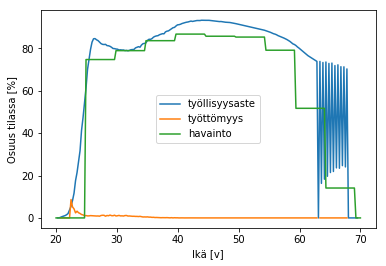

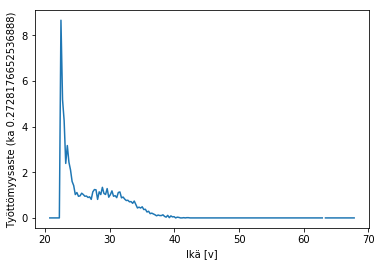

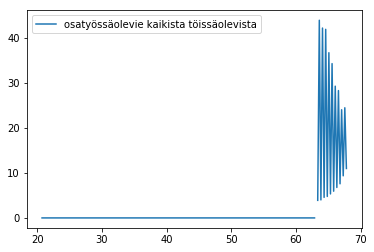

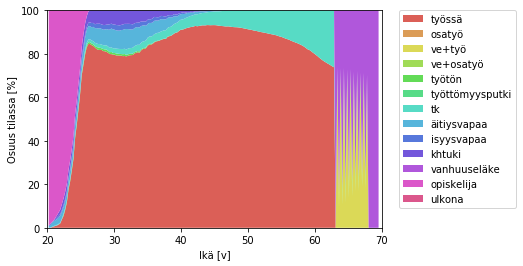

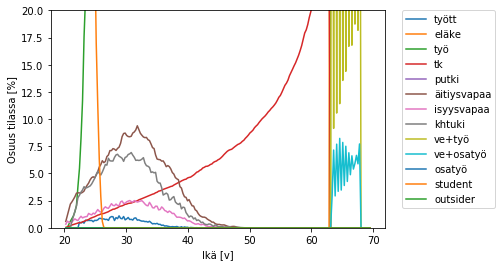

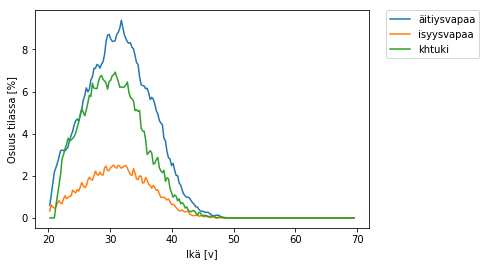

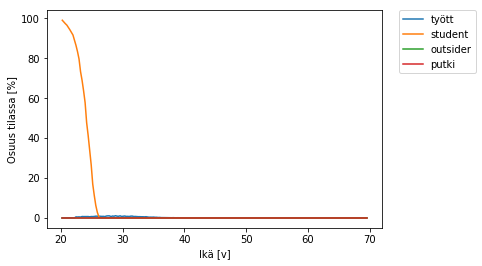

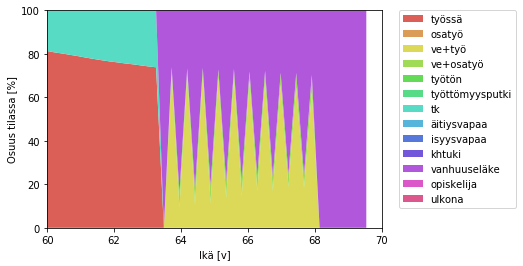

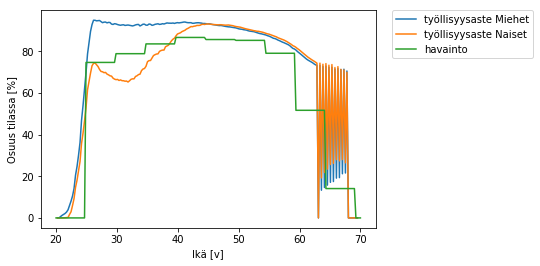

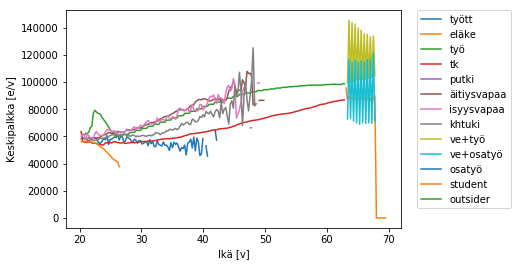

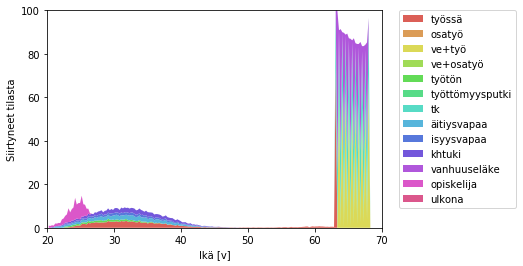

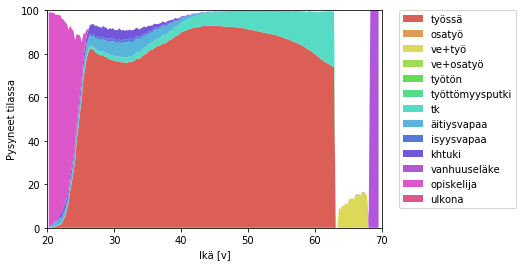

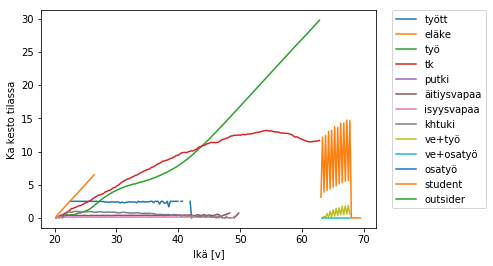

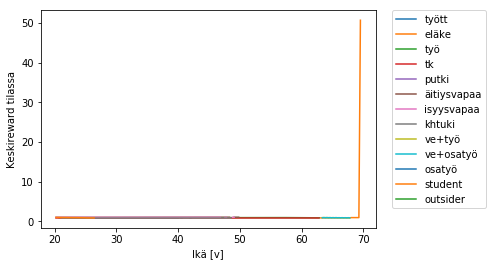

No handles with labels found to put in legend.


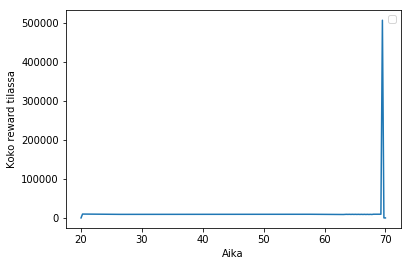

Yhteensä reward 236.1399637712962


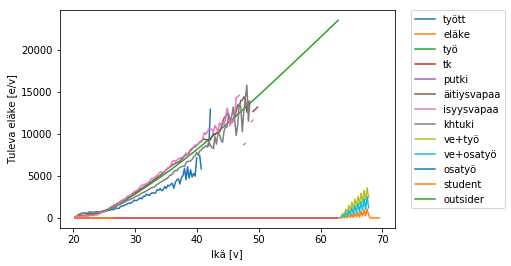

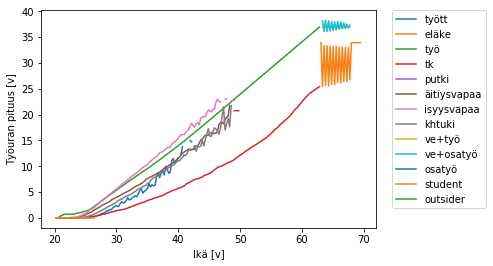

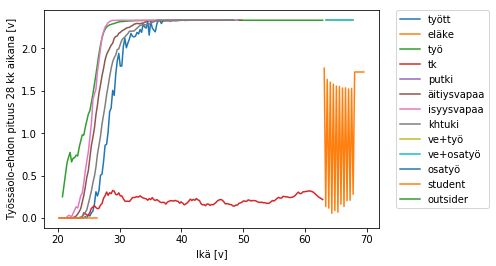

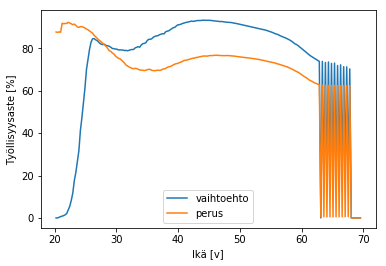

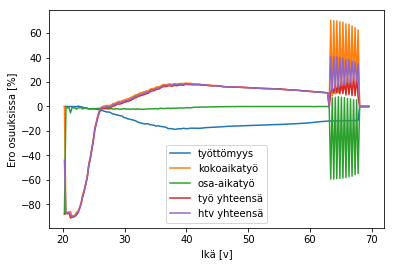

Työllisyysvaikutus 30-63-vuotiaisiin noin 334464.0 htv ja 326796.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 44.32737004447711 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.052677564795330416


In [7]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_putki',
                      plot=True,results='results/putki_results',start_from=perusmalli,cont=True,
                      callback_minsteps=callback_minsteps)
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1)                    

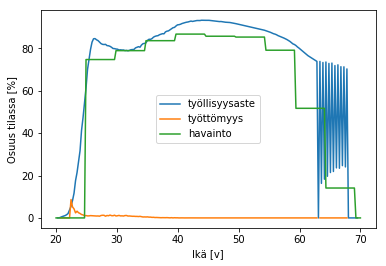

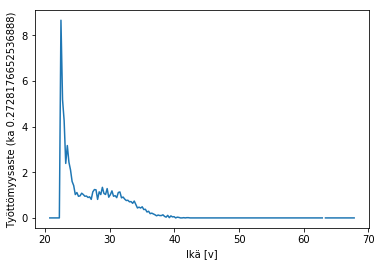

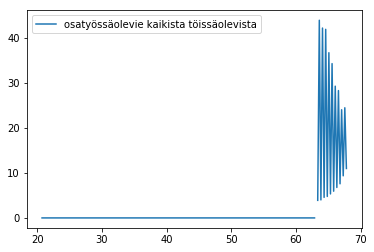

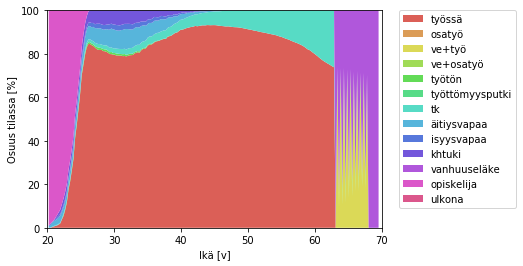

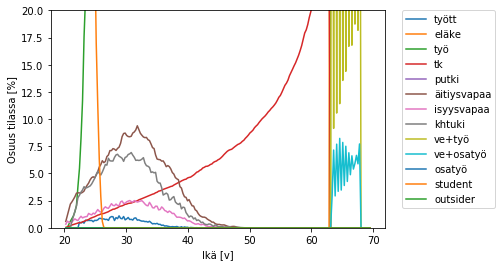

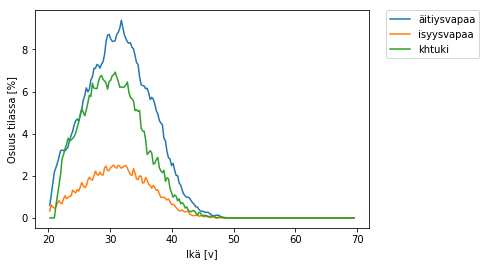

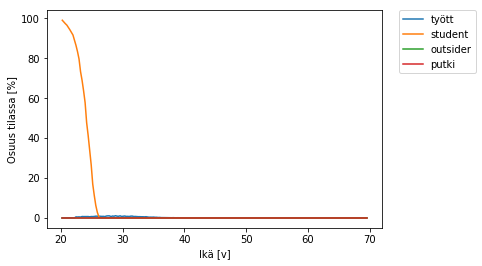

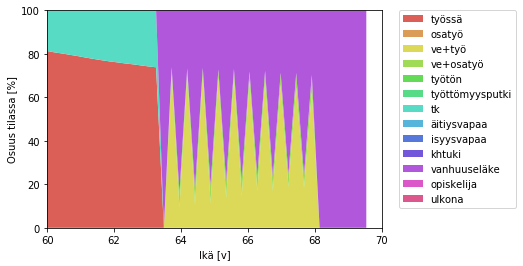

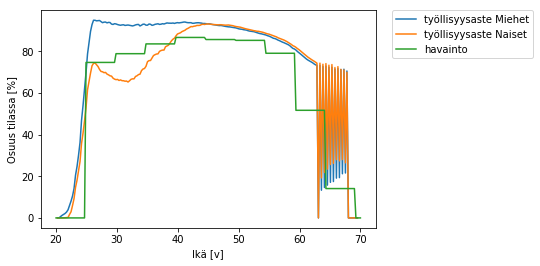

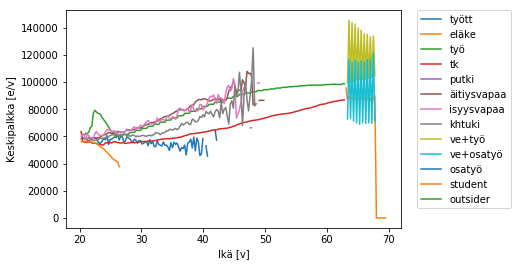

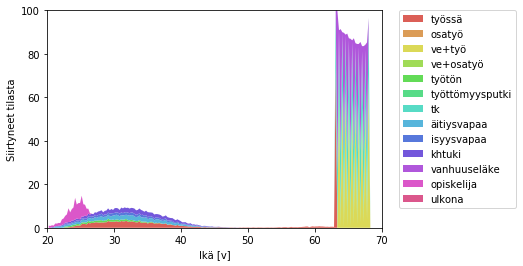

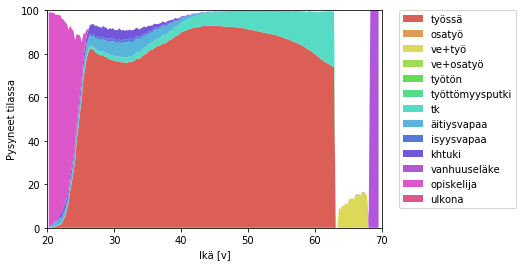

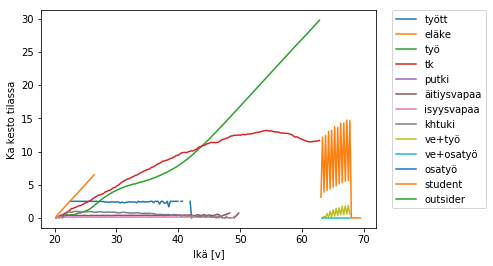

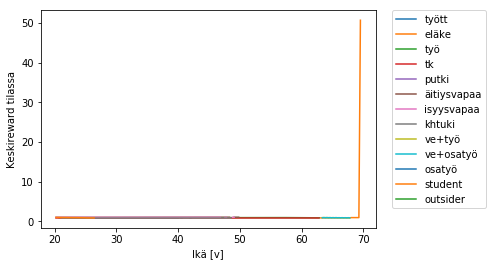

No handles with labels found to put in legend.


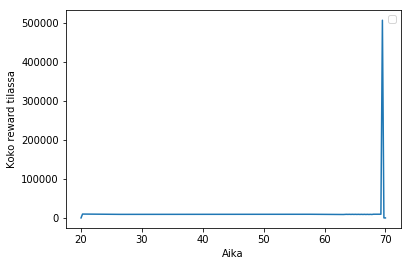

Yhteensä reward 236.1399637712962


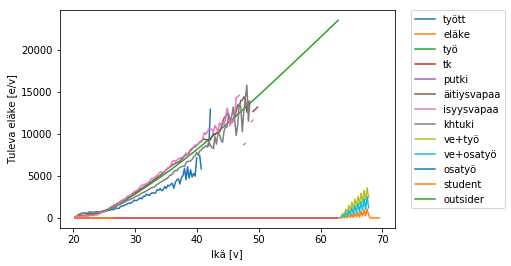

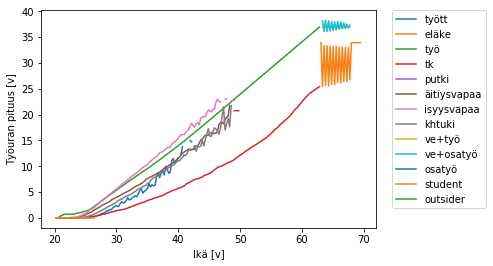

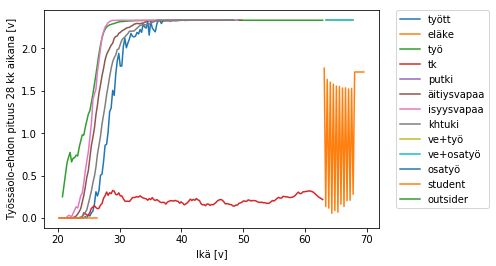

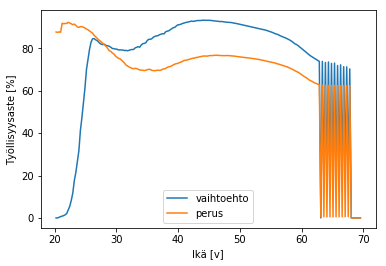

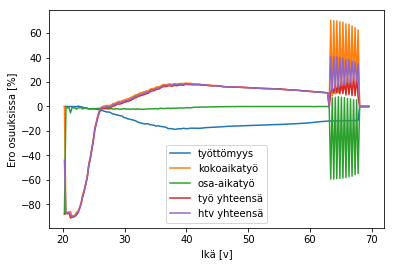

Työllisyysvaikutus 30-63-vuotiaisiin noin 334464.0 htv ja 326796.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 44.32737004447711 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.052677564795330416


In [8]:
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1) 

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [9]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_ek',plot=True,
                results='results/ek_results',start_from='best/malli_perus',cont=True,
                callback_minsteps=callback_minsteps)
cc2.render(load='results/ek_results')
cc2.load_sim(load='results/ek_results')

No mortality included
train...
phase 1
acktr acktr
batch 1 learning rate 0.25 scaled 0.25


ValueError: The specified policy kwargs do not equal the stored policy kwargs. Stored kwargs: {'act_fun': <function relu at 0x129b2b268>, 'net_arch': [512, 512]}, specified kwargs: {'act_fun': <function relu at 0x129b2b268>, 'net_arch': [512, 512, 256]}

In [ ]:
cc2.compare_with(cc1)
#print(cc1.episodestats.empstate/cc1.n_pop,cc2.episodestats.empstate/cc2.n_pop)
#cc2.episodestats.load_sim('results/ek_res__best')
#cc2.episodestats.render()

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,save='best/best_12kk',plot=True,
                    results='results/12kk_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc1_toe.render(load='results/12kk_results')
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,save='best/malli_50pv',plot=True,
                    results='results/50pv_results',start_from=perusmalli,cont=True,
                    callback_minsteps=callback_minsteps)
cc1_350.render(load='results/50pv_results')
cc1_350.compare_with(cc1)

# Perustulo

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_pt',plot=True,
                   results='results/perustulo_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc1_pt.render(load='results/perustulo_results')
cc1_pt.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_300pv',plot=True,
                    results='results/300pv_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc1_400.render(load='results/300pv_results')
cc1_400.compare_with(cc1)